In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats import norm, skew
from scipy import stats
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
%matplotlib inline

In [2]:
fold_name = os.path.join(os.path.abspath('./'), 'Data')

In [3]:
filename = os.path.join(fold_name, 'application_train.csv')

In [4]:
app_train = pd.read_csv(filename)
filename = os.path.join(fold_name, 'application_test.csv')
app_test = pd.read_csv(filename)

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train.shape #30W+记录，122条特征

(307511, 122)

In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
app_test.shape

(48744, 121)

In [11]:
app_test.columns #比train少一个target

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### 二分类问题先画出标签的直方图，观察是否有偏斜。
##### 偏斜类的解决方法有两种，一种是采样方法，分为上采样和下采样；一种是评估标准，采用ROC和AUC评估

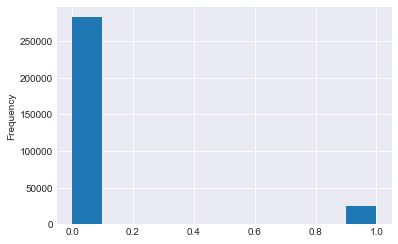

In [12]:
app_train['TARGET'].astype(int).plot.hist()# 偏斜

### Examine Missing Values

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = mis_val / len(df) * 100
    
    # Make a table with results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0:'Missing Values', 1:'% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + 'columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + 
          'columns that have missing values.')
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [14]:
# Missing value statistics
missing_values = missing_values_table(app_train)
missing_values.head(30)

Your selected dataframe has 122columns.
There are 67columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [15]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [16]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0) #获取Series中的唯一值，即去重

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables

##### Before we go any further, we need to deal with pesky categorical variables.A machine learning model unfortunately cannot deal with categorical variables(except for some model such as Light GBM).Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model.There are two main ways to carry out this process:

### Label Encoding:
##### assign each unique category in a categotical variable with an integer. No new columns are created.
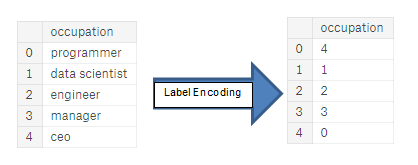

### One-hot encoding:
##### create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
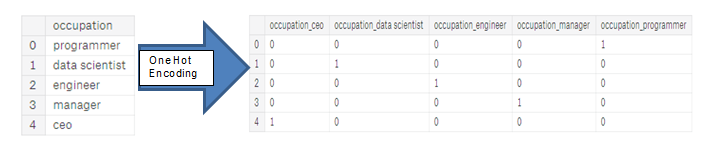

  Label Encoding的问题在于它随机排序了类别，分配给每个类别的值是随机的，并不反映该类别的任何固有方面。譬如上例中，将programmer编码为4，data scientist编码为1，但是如果我们进行相同的处理，标签的结果可能会完全不同。整数的实际赋值是随意的，因此，当我们执行Label Encoding的时候，模型可能会使用编码的相对值（如programmer=1,data scientist=4）来赋予我们不想要的权重。
  
如果分类变量中只有一个二值变量（如 男/女），使用Label Encoding会取的很好的结果，但是如果超过两个变量，one-hot编码可能是更好的选择。

作者认为one-hot编码是最安全的方法，因为它不会对类别强加任意值。one-hot编码唯一的缺点是特征的数量可能会爆炸，即维度爆炸，分类变量有很多类别。我们可以使用one-hot编码，然后再执行PCA或其他方法降维，以减少维度数量（同时仍尝试保留信息）

在此我们将对二分类变量使用Label Encoding，对任何具有2个以上类别的分类变量使用one-hot编码。（暂时先不降维）

### Label Encoding and One-Hot Encoding

###### Let's implement the policy described above: for any categorical variable(dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.
###### For label encoding,we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [17]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        #If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
print(f'{le_count} columns were label encoded.')

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print(f'Training Feature shape: {app_train.shape}')
print(f'Testing Feature shape: {app_test.shape}')

Training Feature shape: (307511, 243)
Testing Feature shape: (48744, 239)


### Aligning Training and Testing Data

##### There need to be the same features(columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in training data that are not in the testing data, we need to align the dataframes. First we extract the traget column from the training data(because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis =1 to align the dataframes based on the columns and not on the rows!

In [4]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis = 1)

# Add the target back in 
app_train['TARGET'] = train_labels

print(f'Training Feature shape: {app_train.shape}')
print(f'Testing Feature shape: {app_test.shape}')

NameError: name 'app_train' is not defined

由于one-hot编码时的特征数量有了显著的增加，因此我们要使用dimensionality reduction(移除不相关特征)to reduce the size of the datasets.

### Back to Exploratory Data Analysis

#### Anomalies

在做EDA测试的时候我们总希望注意的一个问题是数据中的异常。这些可能是由于错误输入的数字、测量设备的错误，或者它们可能是有效的，但是却是特别极端情况下的测量值。定量支持异常的一种方法是使用describe方法查看列的统计信息。DAYS_BIRTH列中的数字为负数，因为它们是相对于当前贷款申请记录的。要查看这些年份的统计数据，我们可以将 -1× -1 再除以一年的天数：

In [20]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [21]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

This doesn't look right! The maximum value(besides being positive) is about 1000 years!

Text(0.5,0,'Days Employment')

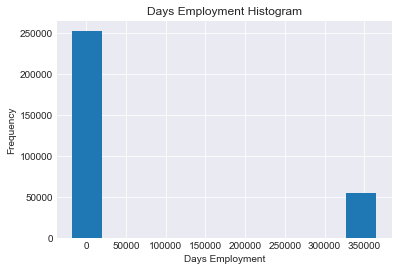

In [22]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

#### 对于异常客户进行分组，观察他们比起其他客户是否倾向于更高或者更低的默认利率。

In [23]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print(f'The non-anomalies default on {100 * non_anom["TARGET"].mean():.2f}% of loans')
print(f'The anomalies default on {100 * anom["TARGET"].mean():.2f}% of loans')
print(f'There are {len(anom)} anomalous days of employment')

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


有趣的是事实证明，异常的违约率较低。

处理异常取决于具体情况，没有设定规则。 最安全的方法之一就是将异常设置为缺失值，然后在机器学习之前填充它们（使用Imputation）。 在这种情况下，由于所有异常都具有完全相同的值，我们希望用相同的值填充它们，以防所有这些贷款共享一些共同点。 异常值似乎有一些重要性，所以我们想告诉机器学习模型我们是否确实填写了这些值。 作为解决方案，我们将填入不是数字（np.nan）的异常值，然后创建一个新的布尔列，指示该值是否异常。

Text(0.5,0,'Days Employment')

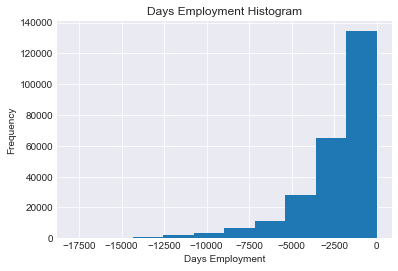

In [24]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

分布看起来更符合我们的预期，我们还创建了一个新列，告诉模型这些值最初是异常的（因为我们必须用一些值来填充nans，可能是该列的中位数）。 数据框中带有DAYS的其他列看起来与我们期望的没有明显的异常值有关。

作为一个非常重要的注意事项，我们对训练数据所做的任何事情，我们也必须对测试数据做。 让我们确保创建新列并在测试数据中用np.nan填充现有列。

In [25]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

print(f'There are {app_test["DAYS_EMPLOYED_ANOM"].sum()} anomalies in the test data out of {len(app_test)} entries')

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

处理过分类变量和异常值之后，接下来寻找特征（Feature）和目标（target）之间的相关性。可以通过.corr dataframe方法来计算每个变量与目标之间的皮尔逊（Perarson）相关系数。

相关系数不是表示特征“相关性”的最佳方法，但是确实让我们了解数据中的可能关系。对相关系数绝对值的一般解释是：
- 00-.19 “very weak”
- 20-.39 “weak”
- 40-.59 “moderate”
- 60-.79 “strong”
- 80-1.0 “very strong”

In [26]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

###### 从相关系数可以看出: DAYS_BIRTH与TARGET呈正相关，而DAYS_BIRTH代表客户的年龄距借贷时的天数，用负数表示。数值为负数，但是却是正相关，这说明随着客户变老（负数绝对值越大），他们违约的可能性越小（target==0），我们可以将采用正值，相关系数设为负值。

### Effect Age on Repayment

In [27]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

As the cilent gets older, there is a negative linear relationship with the target meaning that as client get order, they tend to repay their loans on time more often.

Let's start looking at this variable.First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

Text(0,0.5,'Count')

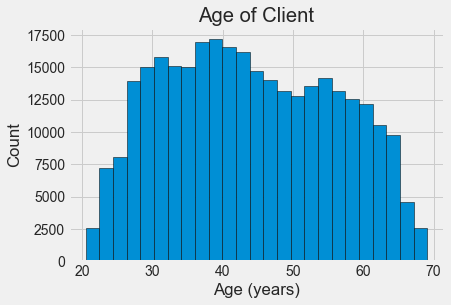

In [28]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

就其本身而言，年龄除了分布没有异常外并没有告诉我们更多的信息，为了可视化年龄对目标（target）的影响，我们会根据target来绘制核密度估计图（KDE），核密度估计图显示单个变量的分布，可以看作是平滑的直方图（它通过在每个数据点计算内核，通常是高斯和，然后平均所有单个内核来开发单个平滑的曲线），我们使用 seaborn kdeplot作图。

Text(0.5,1,'Distribution of Ages')

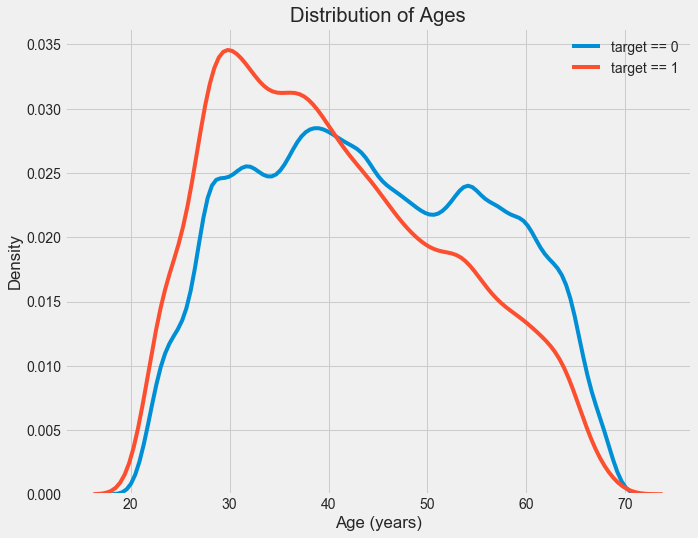

In [29]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

target == 1 曲线偏向更年轻的范围，虽然这不是一个显著的相关性（-0.07的相关系数），但这个变量很可能在机器学习模型中有用，因为它确实会影响目标。我们可以用另一种方式看待这种关系：未能偿还贷款的平均年龄段。

为了制作这个图，我们先将年龄类别按5年为单位分段。然后，对于每段，我们计算平均值，它告诉我们每个类别中未偿还贷款的比率。

In [30]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [31]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to Reapy by Age Group')

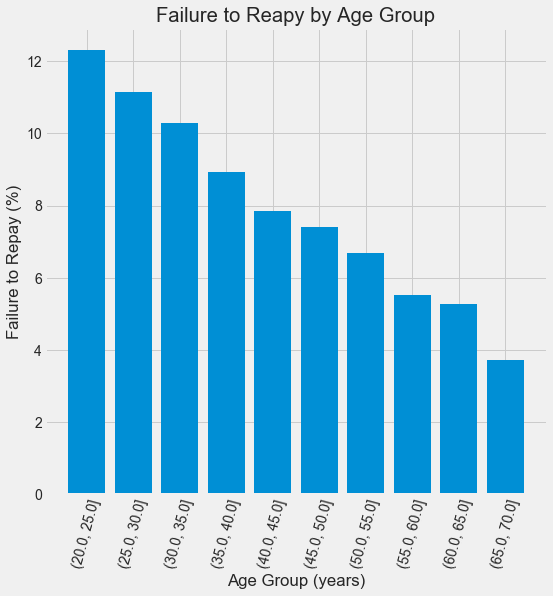

In [32]:
plt.figure(figsize=(8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Reapy by Age Group')

从上图中可以看出，年轻人可能更倾向于拒绝偿还贷款，20-25岁的年轻人要超过10%，而65-70岁的人则不超过5%。
银行可以直接使用该信息：由于年轻客户不太可能偿还贷款，因此应向他们提供更多的指导或者财政技巧，当然这并不是歧视年轻客户，但是我们应该采取措施帮助他们及时还款。

### Exterior Sources

The 3 variables with the strongest negative correlavtions with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these feature represent a "normalized score from exterbal data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [33]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

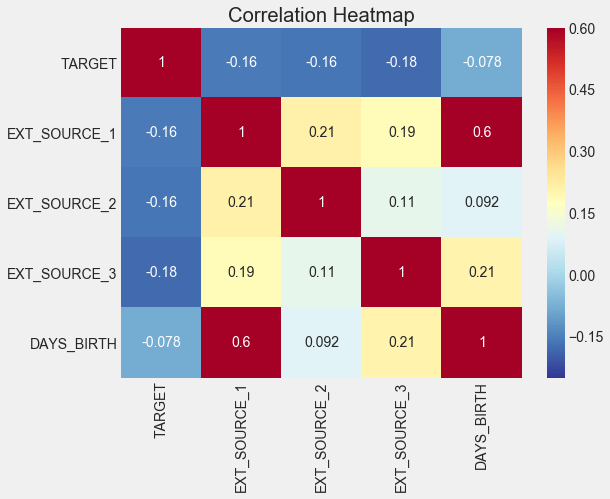

In [34]:
plt.figure(figsize=(8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin= -0.25, annot=True, vmax= 0.6)
plt.title('Correlation Heatmap')

所有的外部指标关于target都有一个负的相关系数，这说明随着EXT_SOURCE的上升，客户偿还贷款的可能性越高。而且我们可以看出DAYS_BIRTH与EXT_SOUCRE呈正相关，这说明客户的年龄可能是外部指标的数据源之一。

下一步我们可以观察一下这些特征关于target的分布图，这会使我们可视化此变量对目标的影响。

C:\Users\L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


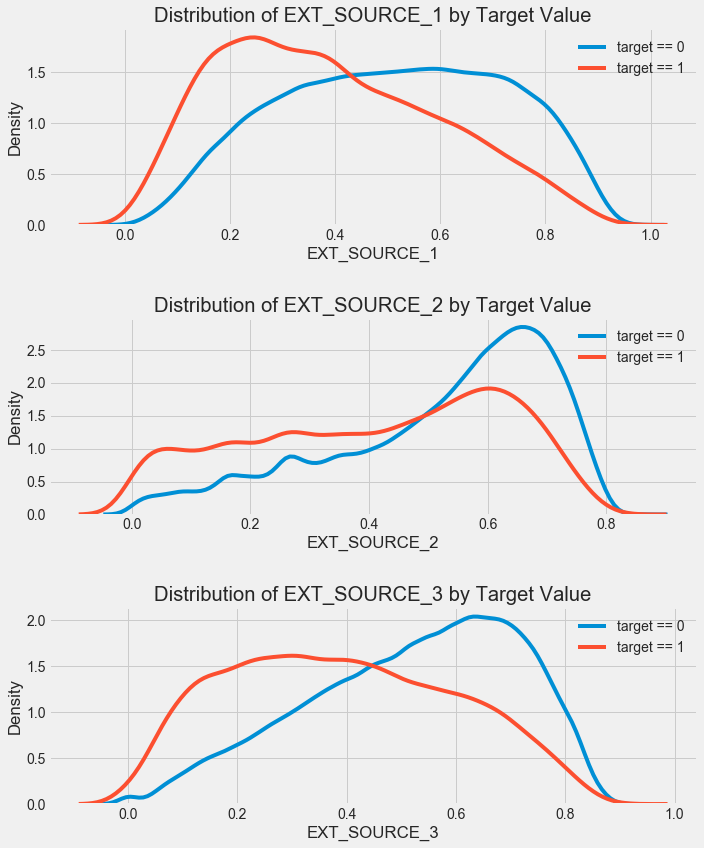

In [35]:
plt.figure(figsize=(10, 12))

#iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3显示目标值之间的最大差异。 我们可以清楚地看到，此功能与申请人偿还贷款的可能性有一定关系。 这种关系不是很强（实际上它们都被认为非常弱，但这些变量对于机器学习模型仍然有用，可以预测申请人是否会按时偿还贷款。

### Pairs Plot
最后我们可以绘制EXT-source变量和DAYS_BIRTH变量的对图，Pairs Plot是一个很好的探索工具，它可以让我们看到多对变量之间的关系以及单个变量的分布。在这里，我们使用seaborn可视化库和PairGrid函数创建一个对图，其中上三角上有散点图，对角线有直方图，下三角有二维核密度图和相关系数。

Text(0.5,1.05,'Ext Source and Age Features Pairs Plot')

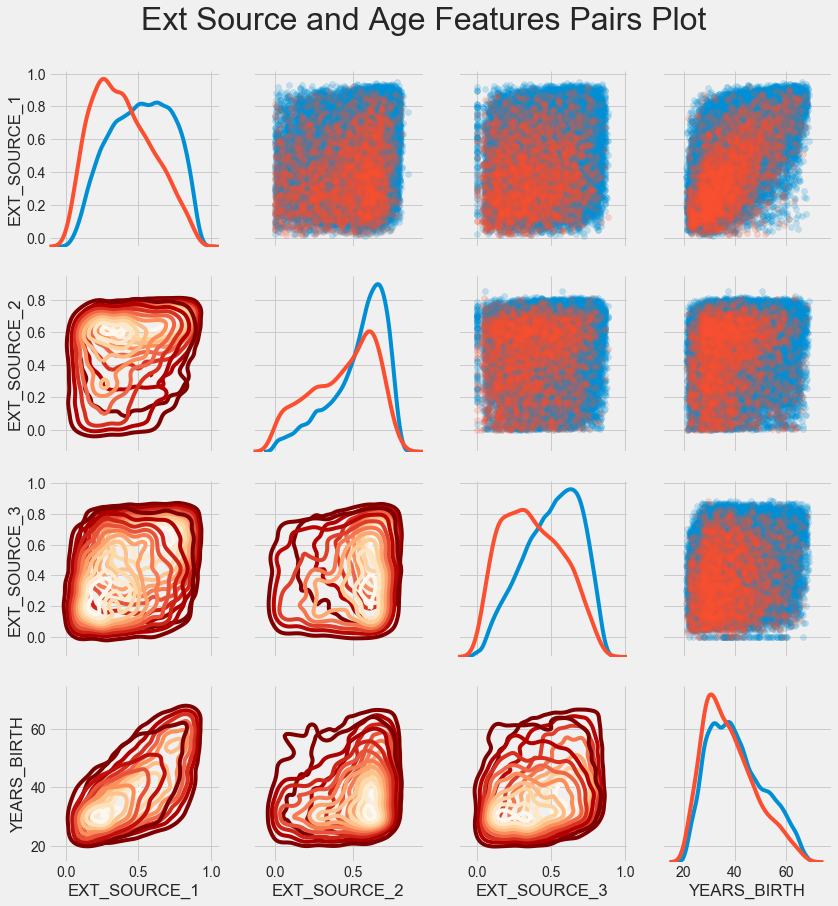

In [36]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns 计算相关系数
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8), xycoords=ax.transAxes,
               size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False,
                   hue = 'TARGET',
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histgram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)

在这个图中，红色表示未偿还的贷款，蓝色表示已支付的贷款。可以看到数据中的不同关系。EXT_SOURCE_1和DAYS_BIRTH（或等效的YEARS_BIRTH）之间似乎存在适度的正线性关系，表明此特征可能会考虑客户的年龄。

### Feature Engineering
Kaggle比赛的取胜之道在于特征工程：那些从数据中创建最有用特征的人才能获胜。（在大多数情况下，这是正确的。因为获胜的模型，至少对于结构化数据，所有这些都倾向于梯度增强的变体）。这代表了机器学习中的一种模式：特征工程比模型构建和超参数调整具有更高的投资回报。正如Andrew Ng喜欢说的那样：“应用机器学习本质上就是特征工程”。

虽然选择正确的模型和最佳的设置很重要，但是模型只能从给出的数据中学习。确保这些数据与任务尽可能相关是科学家的工作（也许还有一些自动化工具可以帮助我们）。

特征工程是指一个基本过程，可以设计特征构造：从现有数据中添加新特征，以及特征选择：仅选择最重要的特征或者其他降维方法。我们可以使用许多技术来创建特征和选择特征。

当我们开始使用其他数据源是，我们将进行大量的特征工程，但现在，我们只尝试两种简单的功能构建方法：

- Polynomial features 多项式特征
- Domain knowledge features 领域知识特征

### Polynomial feature

多项式特征是一种简单的特征构造方法。该方法中，我们创建的特征是现有特征中比较强的特征以及现有特征之间的交互项。例如，我们可以创建变量EXT_SOURCE_1^2 and EXT_SOURCE_2^2, EXT_SOURCE_1 x EXT_SOUCRE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2,等等。这些由多个单独变量组成的特征叫做交互项（interaction terms）,因为它捕获了特征间的交互。换句话说，虽然变量本身可能不会对目标（target）产生什么影响，但是它们的组合项形成的特征恒可能与target相关。交互项通常用于统计模型中以捕获多个变量的影响，但可能在机器学习中不经常使用，尽管如此，在这里我们可以尝试一些，看看他们是否可以帮助我们的模型来预测客户是否会偿还贷款。

在下面的代码中，我们使用EXT_SOURCE变量和DAYS_BIRTH变量创建多项式特征。 Scikit-Learn有一个名为PolynomialFeatures的有用类，它可以创建多项式和交互项达到指定的程度。 我们可以使用3度来查看结果（当我们创建多项式特征时，我们希望避免使用过高的度数，因为特征的数量随着度数呈指数级增长，另一个原因是我们可能会遇到过拟合的问题）。

In [37]:
# Make a new dataframe for polynomial feature
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [38]:
# Train the polunomial features
poly_transformer.fit(poly_features)

# Transfrom the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape:', poly_features.shape)

Polynomial Features shape: (307511, 35)


我们创建了许多新的特征，为了获取名称我们不需使用多项式特征中的get_feature_names方法

In [40]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURECE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURECE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURECE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURECE_2^2',
 'EXT_SOURECE_2 EXT_SOURCE_3',
 'EXT_SOURECE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

将degree设为3一共产生了35个独立的新特征，现在我们观察这些新特征中的任何一个十分与target有关。

In [41]:
# Create a dataframe of the feature
poly_features = pd.DataFrame(poly_features,
                            columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


与原始特征相比，新特征与target之间具有更大（绝对值）的相关性。当我们构建机器学习模型时，可以尝试使用和不使用这些特征来确定它们是否真的有助于模型学习

我们将这些特征添加到训练和测试集数据的副本中，然后评估具有和不具有这些特征的模型。

In [42]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                 columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                               'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how ='left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print(f'Training data with polynomial features shape: {app_train_poly.shape}')
print(f'Testing data with polynomial features shape: {app_test_poly.shape}')

Training data with polynomial features shape: (307511, 275)
Testing data with polynomial features shape: (48744, 275)


### Domain Knowledge Features
可能将其称为“领域知识”并不恰当，但也许我们可以称之为“尝试应用有限的金融知识”。这种思维框架中，我们可以制作一些特征，来捕捉我们认为对判断客户是否会违约贷款的重要性。在这里，我想试用Aguiar脚本启发的五个特征：

- CREDIT_INCOME_PERCENT:信贷金额相对于客户收入的百分比
- ANNUITY_INCOME_PERCENT:贷款年金相对于客户收入的百分比
- CREDIT_TERM:以月为单位的付款期限（因为年金是每月到期金额）
- DAYS_EMPLOYED_PERCENT：相对于客户年龄的就业天数百分比

In [43]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [44]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Visualize New Variables
用图像来表示domain knowledge，对于以上特征，继续用KDE（核密度估计）方法来绘制与TARGET的图像

C:\Users\L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


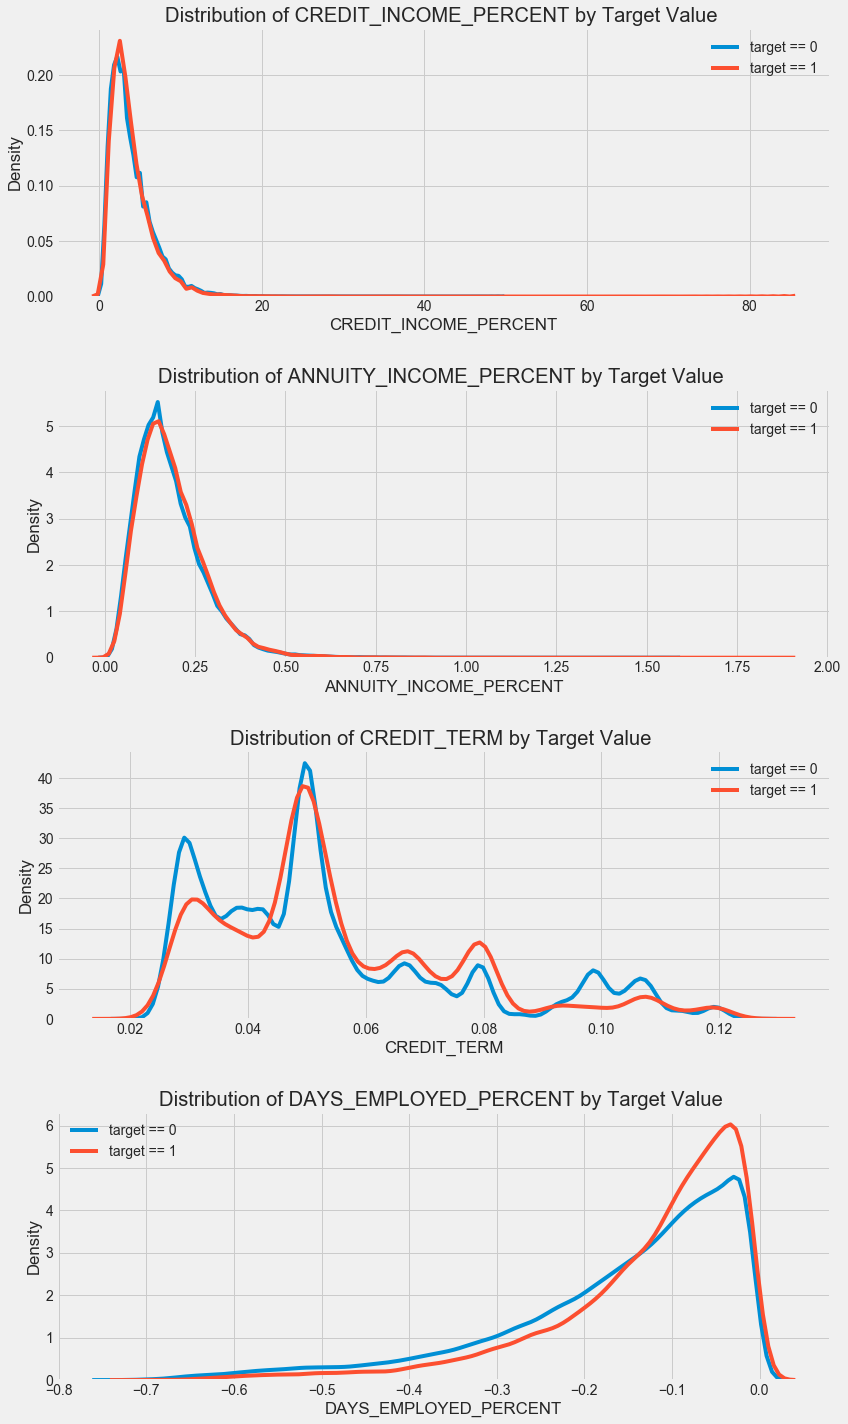

In [45]:
plt.figure (figsize = (12, 20))

# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title(f'Distribution of {feature} by Target Value ')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

很难确定这些特征是否有用，我们可以去掉之后再观察。

### Baseline
最朴素的基准是我们猜测所有测试集的样本都具有相同值。如果我们不确定我们被要求预测未偿还贷款的可能性会是多少时，我们会猜测测试集上的所有观察值是0.5，这使我们在比赛中的AUC、ROC为0.5。

我们已经知道我们将获得什么分数，因此我们并不需要作出随机猜测。我们使用稍复杂的模型：Logistic回归。

### Logistic Regression Implementation
在编码分类变量后使用所有特征。我们通过填充缺失值（插补）和标准化特征范围（特征缩放）来预处理数据。

In [46]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = 'TARGET')
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values 使用imputer进行缺失值插补，差不知为平均数
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transfrorm both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print(f'Training data shape: {train.shape}')
print(f'Testing data shape: {test.shape}')

Training data shape: (307511, 240)
Testing data shape: (48744, 240)


我们将使用Scikit-Learn的LogisticRegression作为我们的第一个模型。 我们将从默认模型设置中进行的唯一更改是降低正则化参数C，它控制过度拟合的数量（较低的值应该减少过度拟合）。 这将使我们获得比默认LogisticRegression更好的结果，但它仍将为任何未来的模型设置一个低标准。

这里我们使用熟悉的Scikit-Learn建模语法：我们首先创建模型，然后使用.fit训练模型，然后使用.predict_proba对测试数据进行预测（记住我们想要概率而不是0或1）。

In [47]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

现在模型已经过训练，我们可以用它来进行预测。 我们想预测不支付贷款的可能性，因此我们使用模型predict.proba方法。 

这将返回一个m x 2数组，其中m是观察数。 第一列是目标为0的概率，第二列是目标为1的概率（因此对于单行，两列必须总和为1）。 我们想要贷款未偿还的概率，因此我们将选择第二列。

In [48]:
# Make predictions
# Make sure to select the second columns only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [49]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


结果仅代表贷款为0或1的概率，要想转换为分类情况，我们需要建立一个概率阈值。

In [50]:
# Save the submission to csv file
submit.to_csv(fold_name + '/log_reg_baseline.csv', index=False)

以上简单的逻辑斯蒂回归会获得0.670的成绩。

### Improved Model:Random Forest
为了提高模型的准确率，我们可以尝试在相同的数据集上使用随机森林，看性能会提高多少。设置为100棵树。

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [52]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature':features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.7s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished


In [53]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv(fold_name + '/random_forest_baseline.csv', index=False)

模型提升了0.008的准确度，达到了0.678

### Make Prediction using Engineered Features
可以将我们在特征工程中做的新特征加入，进行训练，对比模型的准确率。

In [54]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy='median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [55]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.5s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished


In [56]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

#Save the submission dataframe
submit.to_csv(fold_name + '/random_forest_baseline_engineered.csv', index=False)

### Testing Domain Features
Now we can test the domain features we made by hand.

In [57]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy='median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range=(0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators=100, random_state= 50, verbose=1, n_jobs= -1)

In [58]:
# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature':domain_features_names, 'importance':feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.1s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished


In [59]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv(fold_name + '/random_forest_baseline_domain.csv', index=False)

提交时得分为0.679，这可能表明工程特征对此模型没有帮助（但它们确实有助于笔记本末尾的渐变增强模型）。

在以后的笔记本中，我们将使用其他数据源中的信息进行更多功能工程。 从经验来看，这绝对有助于我们的模型！

### Model Interpretation: Feature Importacnes
作为查看哪些变量最相关的简单方法，我们可以查看随机林的特征重要性。 鉴于我们在探索性数据分析中看到的相关性，我们应该期望最重要的特征是EXT_SOURCE和DAYS_BIRTH。 我们可以使用这些特征重要性作为未来工作中减少维数的方法。

In [77]:
def plot_feature_importances(df):
    '''绘制模型特征的重要程度图，如果更高重要性的模型更好，则可以用在任何特征的重要性。
    
    Args:
        df(dataframe):特征的重要程度，必须要有features列和importance列
        
    Returns:
        返回15个最重要的特征所构成的图
        
        df(dataframe):由importance列降序排序特征的重要性，并且包含标准化importance的列
    '''
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalise the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # Make a horisontal bar chart of feature importtances
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most importance on top
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importance')
    plt.show()
    
    return df

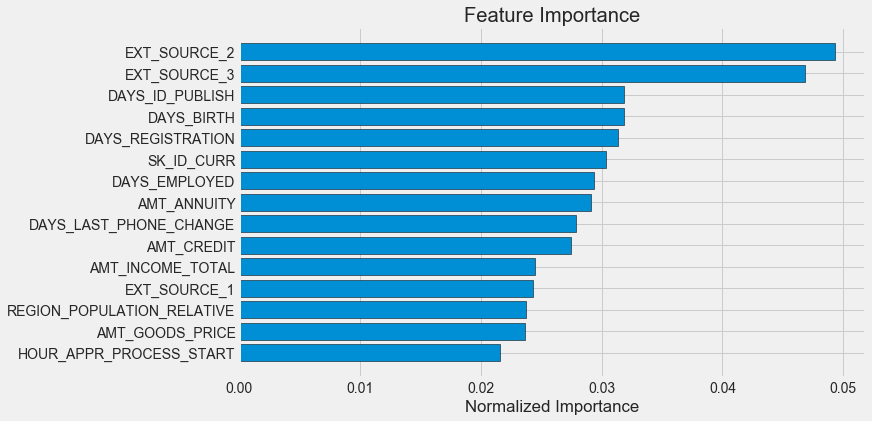

In [78]:
# Show the feature importances for the default features
feature_importance_sorted = plot_feature_importances(feature_importances)

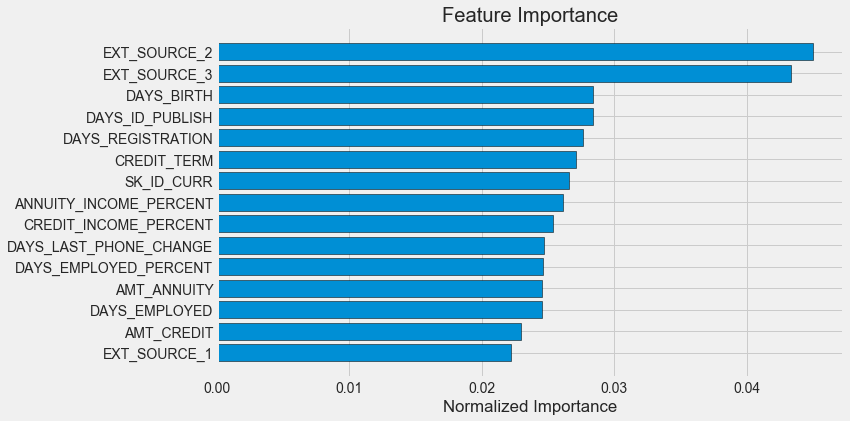

In [79]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

我们手工设计的四个特征都在最重要的前十五名之内，这说明手工制造的特征还是有用处的。

### Conclusion

以上流程中，我们首先要确保了解数据、任务以及评估我们提交内容的指标。然后，我们执行了一个相当简单的EDA来尝试识别可能有助于我们剑魔的关系、趋势
或异常。在此过程中，我们执行了必要的预处理步骤，例如编码分类变量、填充缺失值以及特征缩放等等。然后，我们从现有数据中构建新特征，看这样是否有助
于我们的模型。

一旦数据探索，数据准备和特征工程完成，我们就实现了一个我们希望改进的基本模型，然后我们建立第二个稍复杂的模型来提高我们的分数，最后我们还进行了
一项实验，以确定添加工程变量的效果。

我们上述过程遵循了机器学习项目的大纲：

1.了解问题和数据
2. 数据清洗和格式化
3. 探索线性数据分析
4. 基本模型
5. 改进模型
6. 模型解释

### Light Gradient Boosting Machine

In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [64]:
def model(features, test_features, encoding='ohe', n_folds = 5):
    '''Train and test a light gradient boosting model using cross validation.
    
    Parameters
        features(pd.DataFrame):
            dataframe of training features to use for training a model. Must include the TRAGET column.
        test_features(pd.DataFrame):
            dataframe of testing features to use for making predictions with a model.
        encoding(str, default = 'ohe'):
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
        n_folds(int, default = 5):
            number of folds to use for cross validations
    
    Return
        submission(pd.DataFrame):
            dataframe with 'SK_ID_CURR' and 'TARGET' prbablities predicted by the model.
        feature_importances(pd.DataFrame):
            dataframe with the feature importances from the model.
        valid_metrics(pd.DataFrame):
            dataFrame with training and validation metrics (ROC AUC) for each fold and overall.
    '''
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str).reshape((-1,))))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str).reshape(-1,)))
                
                # Recode the categorical indices
                cat_indices.append(i)
        
    # Catch error if label encoding schme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
    print('Training Data Shape:', features.shape)
    print('Testing Data Shape:', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np array
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle=True, random_state= 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recoding validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary',
                                  class_weight='balanced', learning_rate=0.05,
                                  reg_alpha=0.1, reg_lambda=0.1,
                                  subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                 eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                 eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature':feature_names, 'importance': feature_importance_values})
    
    #  Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold':fold_names,
                           'train':train_scores,
                           'valid':valid_scores})
    
    return submission, feature_importances, metrics

In [65]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape: (307511, 239)
Testing Data Shape: (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754949	train's auc: 0.79887
Early stopping, best iteration is:
[208]	valid's auc: 0.755109	train's auc: 0.80025
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758539	train's auc: 0.798518
Early stopping, best iteration is:
[217]	valid's auc: 0.758619	train's auc: 0.801374
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762652	train's auc: 0.79774
[400]	valid's auc: 0.762202	train's auc: 0.827288
Early stopping, best iteration is:
[320]	valid's auc: 0.763103	train's auc: 0.81638
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.757496	train's auc: 0.799107
Early stopping, best iteration is:
[183]	valid's auc: 0.75759	train's auc: 0.796125
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758099	trai

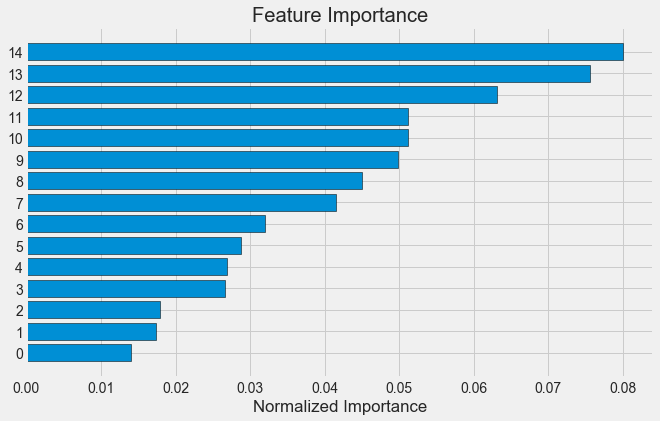

In [66]:
fi_sorted = plot_feature_importances(fi)

In [67]:
submission.to_csv(fold_name + '/baseline_lgb.csv', index=False)

This submission should score about 0.735 on the leaderboard. We will certainly best that in future work!

In [68]:
app_train_domain['TARGET'] = train_labels

# Test the domain knowledge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge feautres metrics')
print(metrics_domain)

Training Data Shape: (307511, 243)
Testing Data Shape: (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762577	train's auc: 0.804531
Early stopping, best iteration is:
[237]	valid's auc: 0.762858	train's auc: 0.810671
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765594	train's auc: 0.804304
Early stopping, best iteration is:
[227]	valid's auc: 0.765861	train's auc: 0.808665
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770139	train's auc: 0.803753
[400]	valid's auc: 0.770328	train's auc: 0.834338
Early stopping, best iteration is:
[302]	valid's auc: 0.770629	train's auc: 0.820401
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765653	train's auc: 0.804487
Early stopping, best iteration is:
[262]	valid's auc: 0.766318	train's auc: 0.815066
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.764456

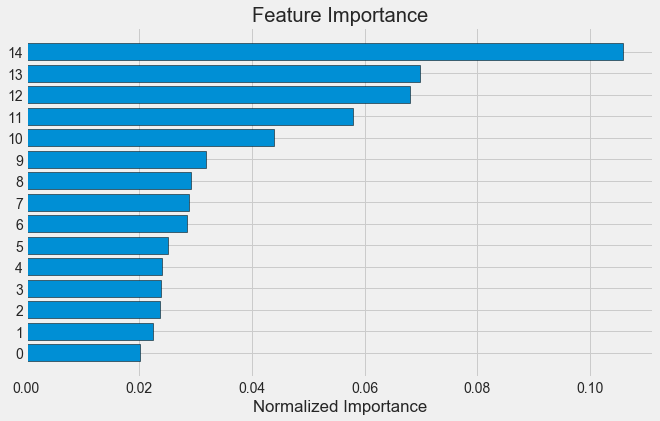

In [69]:
fi_sorted = plot_feature_importances(fi_domain)

In [70]:
submission_domain.to_csv(fold_name + '/baseline_lgb_domain_features.csv', index = False)

In [80]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.248199
1,100005,0.496190
2,100013,0.160126
3,100028,0.225048
4,100038,0.616607


In [83]:
# 使用交叉验证集的随机森林预测
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, train, train_labels, cv=10, method='predict_proba')

In [2]:
from sklearn.metrics import roc_curve
# y_probas_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_labels, y_probas_forest)

NameError: name 'train_labels' is not defined

In [3]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plot_roc_curve(fpr, tpr)
    plt.show()
# plt.plot(fpr, tpr, 'b:', label = 'RandomForest')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legned(loc='bottom rigth')

NameError: name 'fpr_forest' is not defined